In [1]:
import numpy as np
import pyspagtram as tm


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style='ticks')

spot1    4.072755
spot2    1.288831
spot3    3.907526
spot4    0.695993
spot5    1.952259
Name: feature, dtype: float64
               x         y
spot1  13.132041  7.591330
spot2  15.217604  9.432554
spot3  14.247367  8.519520
spot4  14.173802  6.044692
spot5  13.590375  6.590702


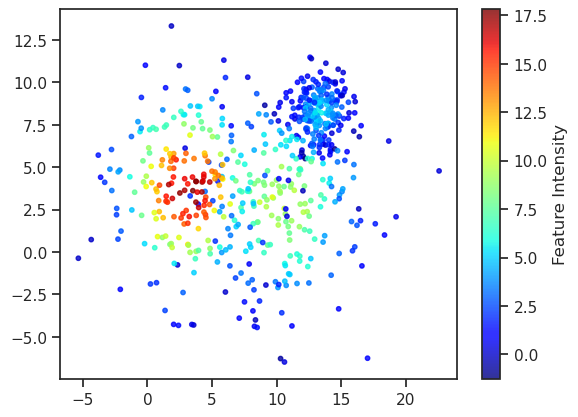

In [2]:
# Simulate a Series of feature (or say, gene expression) of spots and spot-by-coordinate df (with vars 'x' and 'y')
np.random.seed(100)
Y, df_coord = tm.utils.simulate(n_spots_per_cluster=200)
print(Y.head())
print(df_coord.head())
tm.utils.plot_raw(Y, df_coord)
plt.colorbar(label='Feature Intensity')
plt.show()

In [3]:
# Given a seed coordinate, return the potential gradient trajectory
traj_mapper = tm.GradientTrajectoryMapper(
    threshold_RSquared_switchWindowSize=0.6,
    n_extraWindows=8,
    sizeRatio_windowLarger=1.15,
    sizeRatio_windowSmaller=0.85,
    n_points_enough_for_regression=5,
)
print(traj_mapper)

==== GradientTrajectoryMapper ====
- threshold_RSquared: 0.05
- threshold_RSquared_switchWIndowSize: 0.6
- size_window: infer
    + larger: x1.15
    + smaller: x0.85
    + n_extraWindows: 8 (for each of larger and smaller ones, respectively)
- max_iter: 30
- n_points_enough_for_regression: 5
- trajectories: 0 trajectories saved in total
- dataset_used:
    + 0 sets of data used
    + 0 fits performed
==== ==== ==== ==== ==== ====


In [4]:
# Fit 5 times
np.random.seed(0)
traj_mapper.fit_transform(Y, df_coord, 'highest')
traj_mapper.fit_transform(Y, df_coord, 'lowest')
[traj_mapper.fit_transform(Y, df_coord) for _ in range(3)]

/home/xndliu/miniconda3/envs/bioPy310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/xndliu/miniconda3/envs/bioPy310/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Trajectory(RSquared_average: 0.8580776698356005, direction: -1, n_gradients: 2),
 Trajectory(RSquared_average: 0.7363916855686747, direction: 1, n_gradients: 4),
 Trajectory(RSquared_average: nan, direction: 0, n_gradients: 0)]

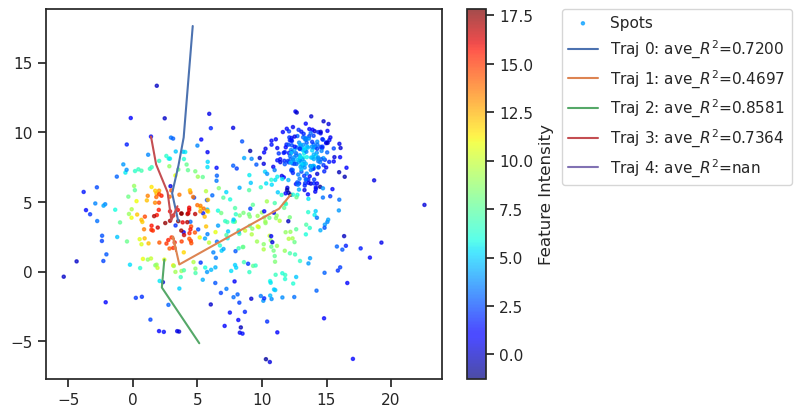

In [5]:
# See fitted trajectories
traj_mapper.plot()
plt.show()

In [6]:
traj_mapper.trajectories

[Trajectory(RSquared_average: 0.7199738337310905, direction: -1, n_gradients: 4),
 Trajectory(RSquared_average: 0.4696771620686374, direction: 1, n_gradients: 4),
 Trajectory(RSquared_average: 0.8580776698356005, direction: -1, n_gradients: 2),
 Trajectory(RSquared_average: 0.7363916855686747, direction: 1, n_gradients: 4),
 Trajectory(RSquared_average: nan, direction: 0, n_gradients: 0)]

In [7]:
traj_mapper

==== GradientTrajectoryMapper ====
- threshold_RSquared: 0.05
- threshold_RSquared_switchWIndowSize: 0.6
- size_window: 3
    + larger: x1.15
    + smaller: x0.85
    + n_extraWindows: 8 (for each of larger and smaller ones, respectively)
- max_iter: 30
- n_points_enough_for_regression: 5
- trajectories: 5 trajectories saved in total
- dataset_used:
    + 1 sets of data used
    + 5 fits performed
==== ==== ==== ==== ==== ====

In [8]:
# Projects surrounding points onto the trajectories
traj_projector = tm.TrajectoryProjector(traj_mapper)
traj_projector.fit()
print(traj_projector)

==== TrajectoryProjector ====
- bound gradient trajectory mapper:
==== GradientTrajectoryMapper ====
- threshold_RSquared: 0.05
- threshold_RSquared_switchWIndowSize: 0.6
- size_window: 3
    + larger: x1.15
    + smaller: x0.85
    + n_extraWindows: 8 (for each of larger and smaller ones, respectively)
- max_iter: 30
- n_points_enough_for_regression: 5
- trajectories: 5 trajectories saved in total
- dataset_used:
    + 1 sets of data used
    + 5 fits performed
==== ==== ==== ==== ==== ====
- projections:
    + 5 projected
    + 4/5 of them are valid (with length>0)
==== ==== ==== ==== ==== ====


In [9]:
traj_projector.projections

[Projection(length: 14.185293135013456, n_points: 33),
 Projection(length: 13.124164244580804, n_points: 198),
 Projection(length: 6.949531202029126, n_points: 13),
 Projection(length: 7.355242888057035, n_points: 46),
 Projection(length: 0, n_points: 0)]

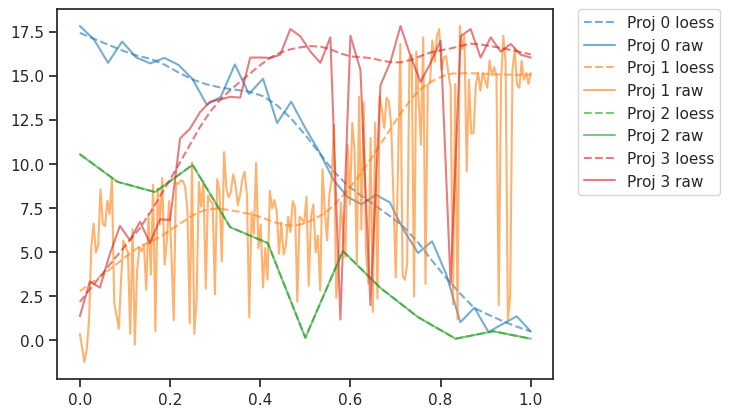

In [10]:
# PLot them out
traj_projector.plot()
plt.show()

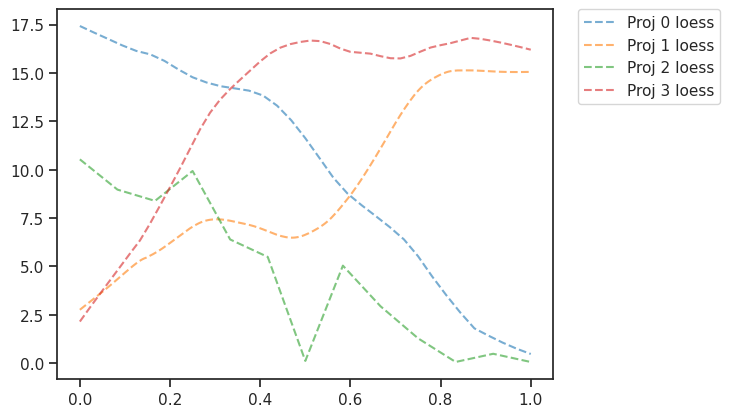

In [11]:
# Only see loess curve
traj_projector.plot(plot_loess='loess-only')
plt.show()

In [12]:
# Future improvements:
# Spearman correlation test
# ...